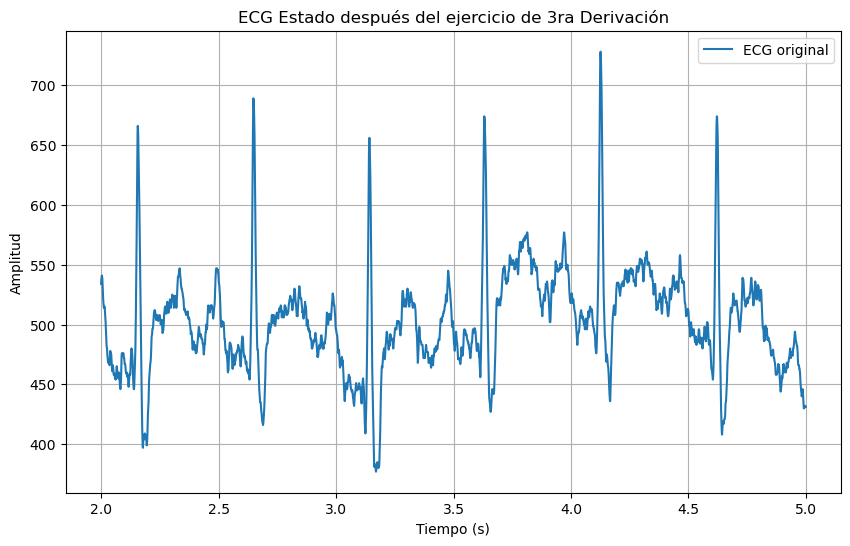

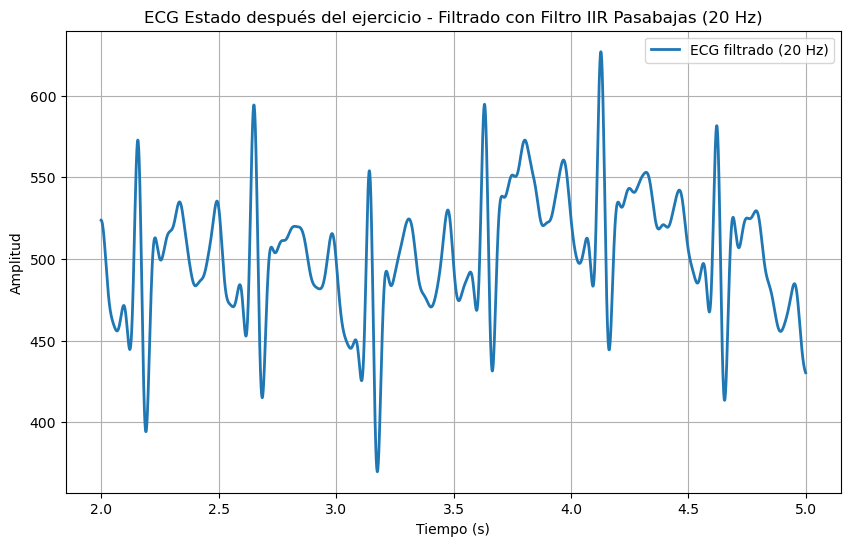

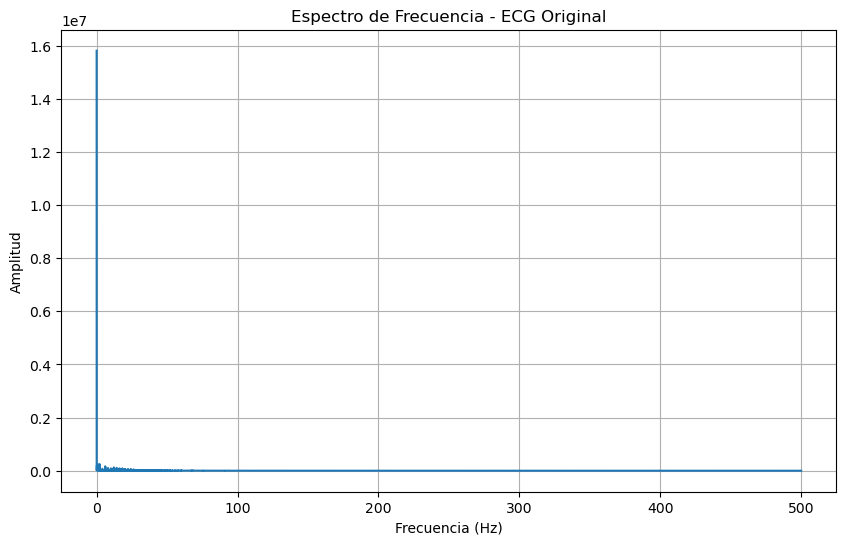

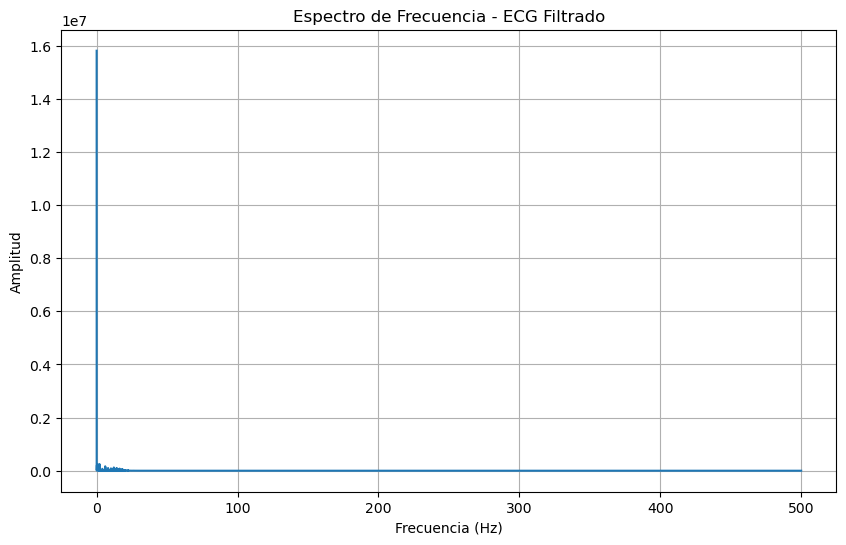

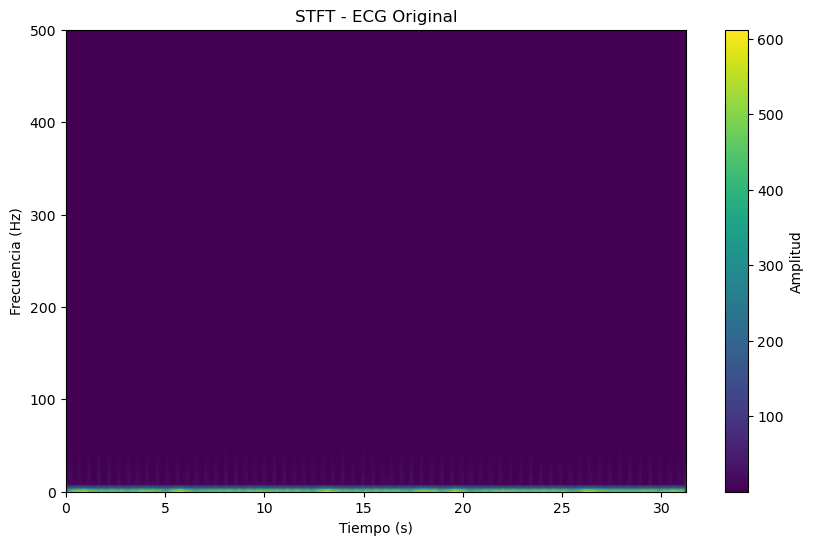

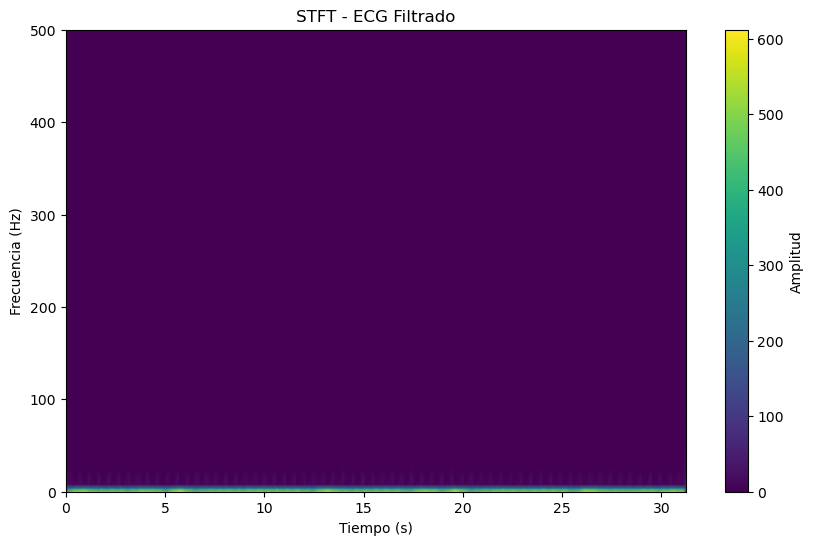

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal as sig

# Función para graficar la señal en el dominio de la frecuencia (FFT)
def plot_fft(signal, fs, title, filename):
    # Calcular la FFT de la señal
    N = len(signal)
    freqs = np.fft.fftfreq(N, 1/fs)
    fft_values = np.fft.fft(signal)
    
    # Graficar solo las frecuencias positivas
    plt.figure(figsize=(10, 6))
    plt.plot(freqs[:N // 2], np.abs(fft_values)[:N // 2])
    plt.title(title)
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.savefig(f"{filename}.png", format='png')
    plt.show()

# Función para graficar la STFT (Transformada de Fourier de Ventana Corta)
def plot_stft(signal, fs, title, filename):
    f, t, Zxx = sig.stft(signal, fs=fs, nperseg=256)  # STFT con ventana de 256 muestras
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    plt.title(title)
    plt.ylabel('Frecuencia (Hz)')
    plt.xlabel('Tiempo (s)')
    plt.colorbar(label='Amplitud')
    plt.savefig(f"{filename}.png", format='png')
    plt.show()

# Cargar el archivo de señal ECG
file_path = 'D:\\Marco Ichillumpa\\Semestre 2024 - 2\\ISB\\Filtros - Lab 7\\Señales\\Ejercicio III deriv.txt'
data = pd.read_csv(file_path, sep='\t', skiprows=10, header=None)

# Frecuencia de muestreo
fs = 1000  # Frecuencia de muestreo en Hz

# Extraer la columna de la señal ECG (columna 5)
ecg_signal = data[5].dropna().values

# Diseño del filtro IIR pasabajas------------------------------------------------------------------
fc = 20  # Frecuencia de corte (en Hz)
b, a = sig.butter(5, fc / (fs / 2), btype='low')

# Aplicar el filtro a la señal ECG
filtered_ecg = sig.filtfilt(b, a, ecg_signal)

# Crear el vector de tiempo
t = np.arange(0, len(ecg_signal)) / fs
#---------------------------------------------------------------------------------------------------

# Definir los límites de tiempo para graficar de 2 a 7 segundos
start_time = 2  # segundos
end_time = 5  # segundos

# Convertir los tiempos a índices
start_index = int(start_time * fs)
end_index = int(end_time * fs)

# Gráfica de la señal original
plt.figure(figsize=(10, 6))
plt.plot(t[start_index:end_index], ecg_signal[start_index:end_index], label='ECG original')
plt.title('ECG Estado después del ejercicio de 3ra Derivación')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.savefig("ECG3.png", format='png')  # Guardar gráfica de la señal original en el tiempo
plt.show()

# Gráfica de la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(t[start_index:end_index], filtered_ecg[start_index:end_index], label='ECG filtrado (20 Hz)', linewidth=2)
plt.title('ECG Estado después del ejercicio - Filtrado con Filtro IIR Pasabajas (20 Hz)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.savefig("ECG3_FILTRO1.png", format='png')  # Guardar gráfica de la señal filtrada en el tiempo
plt.show()

# Graficar el dominio de la frecuencia
# Para la señal original
plot_fft(ecg_signal, fs, 'Espectro de Frecuencia - ECG Original', "FFT_ECG3")

# Para la señal filtrada
plot_fft(filtered_ecg, fs, 'Espectro de Frecuencia - ECG Filtrado', "FFT_ECG3_FILTRO1")

# Graficar la STFT (Transformada de Fourier de Ventana Corta)
# Para la señal original
plot_stft(ecg_signal, fs, 'STFT - ECG Original', "STFT_ECG3")

# Para la señal filtrada
plot_stft(filtered_ecg, fs, 'STFT - ECG Filtrado', "STFT_ECG3_FILTRO1")
